<a target="_blank" href="https://colab.research.google.com/github/Xornotor/PPGEE-Otimizacao-Exercicios/blob/main/Lista-01-A/Q3.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# **Lista de Exercícios 01-A | Questão 3**

**UFBA** | PPGEE0016 - Otimização

**Aluno:** André Paiva Conrado Rodrigues

In [1]:
# Importação de dependências
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize, Bounds, NonlinearConstraint

## **1. Problema de Otimização**

\begin{equation*}
\begin{aligned}
\text{Minimizar} \\
&& f(\boldsymbol{x}) = \frac{1}{4}(x_{1} - 6)^{2} + (x_{2} - 4)^{2} \\
\text{Sujeito a} \\
c_{1}: && x_{1} - 3 = 0 \\
c_{2}: && \frac{80}{7} - x_{2} - \frac{8}{7}x_{1} \geq 0 \\
c_{3}: && x_{2} \geq 0
\end{aligned}
\end{equation*}

## **2. Estimativa manual**

**Trabalhando nas restrições:**

Logo de cara, $x_{1} = 3$. Com isso, podemos reformular o problema do seguinte modo:

\begin{equation*}
\begin{aligned}
\text{Minimizar} \\
&& f(\boldsymbol{x}) = \frac{1}{4}(3 - 6)^{2} + (x_{2} - 4)^{2} \\
\text{Sujeito a} \\
c_{2}: && \frac{80}{7} - x_{2} - \frac{8}{7} \cdot 3 \geq 0 \\
c_{3}: && x_{2} \geq 0
\end{aligned}
\end{equation*}

Trabalhando nos cálculos, "otimizamos" mais ainda o enunciado:

\begin{equation*}
\begin{aligned}
\text{Minimizar} \\
&& f(\boldsymbol{x}) = \frac{9}{4} + (x_{2} - 4)^{2} \\
\text{Sujeito a} \\
c_{2}: && x_{2} \leq 8 \\
c_{3}: && x_{2} \geq 0
\end{aligned}
\end{equation*}

In [2]:
x2 =  np.linspace(-1, 9, 180)
f_x = ((x2 - 4)**2) + (9/4)

**Visualizando a função e a região de restrição graficamente:**

(Considerando o plano $x_{1} = 3$)

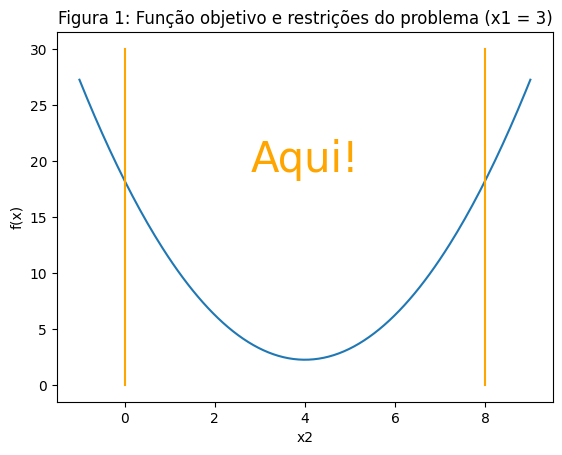

In [3]:
plt.plot(x2, f_x)
plt.plot([0, 0], [0, 30], color='orange')
plt.plot([8, 8], [0, 30], color='orange')

plt.text(2.8, 19, "Aqui!", fontsize=30, color='orange')
plt.xlabel("x2")
plt.ylabel("f(x)")

plt.title("Figura 1: Função objetivo e restrições do problema (x1 = 3)")
plt.show()

Pelo gráfico, percebe-se que há uma tendência de ponto mínimo local próximo de $x_{2} = 4$.

**Plotando a função objetivo original:**

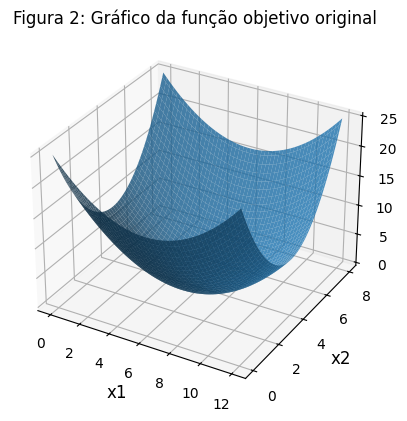

In [4]:
x1 = np.array([np.linspace(0, 12, 100) for _ in range(100)])
x2 = np.array([np.linspace(0, 8, 100) for _ in range(100)]).T
z = (((x1 - 6)**2)/4) + ((x2 - 4)**2)

fig = plt.figure()

ax = plt.axes(projection='3d')

ax.plot_surface(x1, x2, z, alpha=0.8)
ax.set_title("Figura 2: Gráfico da função objetivo original")
ax.set_xlabel('x1', fontsize=12)
ax.set_ylabel('x2', fontsize=12)
plt.show()

### **Encontrando o ponto ótimo global**

**Destrinchando a função objetivo original:**

\begin{equation*}
\begin{aligned}

f(\boldsymbol{x}) = \frac{1}{4}(x_{1} - 6)^{2} + (x_{2} - 4)^{2} \\
f(\boldsymbol{x}) = \frac{x_{1}^{2}}{4} - 3x_{1} + 9 + x_{2}^{2} - 8x_{2} + 16 \\
f(\boldsymbol{x}) = \frac{x_{1}^{2}}{4} - 3x_{1} + x_{2}^{2} - 8x_{2} + 25
\end{aligned}
\end{equation*}

**Derivada parcial da função objetivo em relação a $x_{1}$:**

\begin{equation*}
\begin{aligned}
\frac{\partial f(\boldsymbol{x})}{\partial x_{1}} = \frac{x_{1}}{2} - 3 \\
\frac{x_{1}}{2} - 3 = 0 \implies x_{1} = 6
\end{aligned}
\end{equation*}

**Derivada parcial da função objetivo em relação a $x_{2}$:**

\begin{equation*}
\begin{aligned}
\frac{\partial f(\boldsymbol{x})}{\partial x_{2}} = 2x_{2} - 8 \\
2x_{2} - 8 = 0 \implies x_{2} = 4
\end{aligned}
\end{equation*}

**Conclusões em relação ao ponto ótimo:**

De acordo com as derivadas parciais calculadas acima, o ponto ótimo global é $\boldsymbol{x} = (6, 4)$. Como a restrição $c_{1}$ fixa o valor de $x_{1}$ em 3, conclui-se que o ponto ótimo global ***NÃO*** é restrito.

**Ponto mínimo dentro das restrições:**

Como visto no gráfico da Figura 1 e com base nas restrições, conclui-se que o ponto mínimo restrito é $\boldsymbol{x} = (3, 4)$, o qual leva a $f(\boldsymbol{x}) = 2.25$.

## **3. Solução por algoritmo**

In [5]:
# Função objetivo e funções de restrição
obj = lambda x: (((x[0]-6)**2)/4) + ((x[1]-4)**2)
c2_fun = lambda x: (80/7) - x[1] - ((8/7)*x[0])

# Restrições
cons = [
        NonlinearConstraint(c2_fun, 0, np.inf)
       ]

# Limites de não negatividade
bounds = Bounds(lb=np.array([3, 0]), ub=np.array([3, np.inf]))

#Otimização
res = minimize(obj, (0, 0), method='SLSQP', constraints=cons, bounds=bounds)
res

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 2.25
       x: [ 3.000e+00  4.000e+00]
     nit: 2
     jac: [       nan  0.000e+00]
    nfev: 5
    njev: 2

Por meio da otimização por algoritmo, foi encontrado exatamente o mesmo ponto calculado manualmente: $\boldsymbol{x} = (3, 4)$. Os logs confirmam ainda que o valor da função neste ponto é $2.25$.